In [1]:
import torch
from torch.optim import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cars.csv', index_col='Unnamed: 0')
df

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [4]:
x= torch.FloatTensor( df['speed'].values )
y= torch.FloatTensor( df['dist'].values )

In [5]:
w = torch.empty( 1, requires_grad=True)
b = torch.empty( 1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

tensor([0.6544], requires_grad=True)

In [6]:
def cost():
    hx = w*x + b
    c = torch.mean( (hx-y)**2)
    return c

In [7]:
optimizer = Adam( [w,b] ,lr=0.01 )
for epoch in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print('cost', c.item() )

cost 1945.10791015625
cost 1931.0506591796875
cost 1917.0540771484375
cost 1903.119384765625
cost 1889.24755859375
cost 1875.4395751953125
cost 1861.696044921875
cost 1848.018798828125
cost 1834.4080810546875
cost 1820.864990234375
cost 1807.3900146484375
cost 1793.9847412109375
cost 1780.649169921875
cost 1767.3846435546875
cost 1754.19140625
cost 1741.07080078125
cost 1728.0228271484375
cost 1715.048583984375
cost 1702.1480712890625
cost 1689.3226318359375
cost 1676.572021484375
cost 1663.897216796875
cost 1651.298095703125
cost 1638.77587890625
cost 1626.330322265625
cost 1613.9620361328125
cost 1601.6708984375
cost 1589.45751953125
cost 1577.3221435546875
cost 1565.2650146484375
cost 1553.2862548828125
cost 1541.3856201171875
cost 1529.5634765625
cost 1517.8199462890625
cost 1506.155517578125
cost 1494.5693359375
cost 1483.0618896484375
cost 1471.6331787109375
cost 1460.2830810546875
cost 1449.01171875
cost 1437.818603515625
cost 1426.7041015625
cost 1415.66748046875
cost 1404.7093

cost 267.3477478027344
cost 267.33978271484375
cost 267.33184814453125
cost 267.3238830566406
cost 267.3159484863281
cost 267.3080139160156
cost 267.3000183105469
cost 267.29205322265625
cost 267.2840576171875
cost 267.2760925292969
cost 267.2680969238281
cost 267.2601318359375
cost 267.2521057128906
cost 267.2441101074219
cost 267.236083984375
cost 267.2280578613281
cost 267.2200622558594
cost 267.2120361328125
cost 267.2039794921875
cost 267.1959533691406
cost 267.18792724609375
cost 267.17987060546875
cost 267.1718444824219
cost 267.1637878417969
cost 267.1557312011719
cost 267.14764404296875
cost 267.13958740234375
cost 267.13153076171875
cost 267.1234130859375
cost 267.1153564453125
cost 267.1072998046875
cost 267.0991516113281
cost 267.091064453125
cost 267.08294677734375
cost 267.0748291015625
cost 267.0667419433594
cost 267.0586853027344
cost 267.050537109375
cost 267.0423583984375
cost 267.0342712402344
cost 267.0260925292969
cost 267.0179748535156
cost 267.0097961425781
cost 

cost 258.8566589355469
cost 258.8454895019531
cost 258.83428955078125
cost 258.8231506347656
cost 258.81195068359375
cost 258.80072021484375
cost 258.7895812988281
cost 258.7783508300781
cost 258.7671813964844
cost 258.7559814453125
cost 258.7447509765625
cost 258.73358154296875
cost 258.722412109375
cost 258.71124267578125
cost 258.70001220703125
cost 258.68878173828125
cost 258.6775817871094
cost 258.6663818359375
cost 258.6551513671875
cost 258.6439514160156
cost 258.6327209472656
cost 258.62152099609375
cost 258.6102600097656
cost 258.5990295410156
cost 258.5877990722656
cost 258.5766296386719
cost 258.56536865234375
cost 258.55413818359375
cost 258.5428771972656
cost 258.5316467285156
cost 258.5204162597656
cost 258.5091857910156
cost 258.4979248046875
cost 258.4866943359375
cost 258.4754333496094
cost 258.4642028808594
cost 258.45294189453125
cost 258.4416809082031
cost 258.4304504394531
cost 258.419189453125
cost 258.40789794921875
cost 258.39666748046875
cost 258.3853759765625


In [14]:
def hxFn( xdata ):
    xd = torch.FloatTensor( xdata )
    hx = w*xd + b
    return hx.detach().numpy() # requires_grad=True 인 텐서node 는 hx.detach().numpy()

In [15]:
hxFn( [5, 7])

array([13.833356, 19.750628], dtype=float32)

In [17]:
pred = hxFn( x )
pred

array([10.874719, 10.874719, 19.750628, 19.750628, 22.709265, 25.667902,
       28.62654 , 28.62654 , 28.62654 , 31.585176, 31.585176, 34.54381 ,
       34.54381 , 34.54381 , 34.54381 , 37.50245 , 37.50245 , 37.50245 ,
       37.50245 , 40.461086, 40.461086, 40.461086, 40.461086, 43.419724,
       43.419724, 43.419724, 46.37836 , 46.37836 , 49.336998, 49.336998,
       49.336998, 52.295635, 52.295635, 52.295635, 52.295635, 55.254272,
       55.254272, 55.254272, 58.21291 , 58.21291 , 58.21291 , 58.21291 ,
       58.21291 , 64.13018 , 67.08881 , 70.04745 , 70.04745 , 70.04745 ,
       70.04745 , 73.00609 ], dtype=float32)

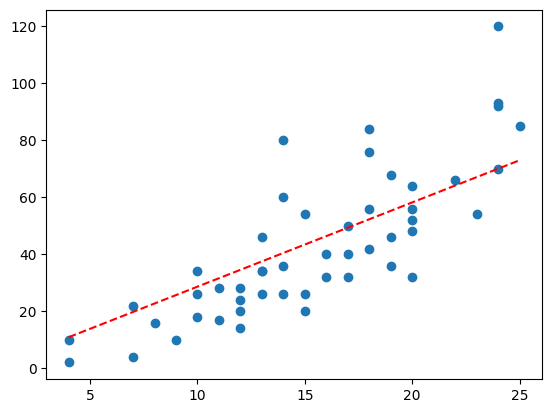

In [20]:
plt.scatter( x,y )
plt.plot( x, pred,'r--')
plt.show()